In [1]:
import os 
import pickle
import numpy as np 

file_path = os.getcwd() + r'\Hasil_RBL'


Hist_acc_train = []
Hist_acc_val = []
Hist_loss_train = []
Hist_loss_val = []

for i in range (845):
    try:
        with open(file_path + rf'\Hist_acc_train {i}.pkl', 'rb') as f:
            Hist_acc_train.append(np.array(pickle.load(f)))
    except:
        continue

    try:
        with open(file_path + rf'\Hist_acc_val {i}.pkl', 'rb') as f:
            Hist_acc_val.append(np.array(pickle.load(f)))
    except:
        continue

    try:
        with open(file_path + rf'\Hist_loss_train {i}.pkl', 'rb') as f:
            Hist_loss_train.append(np.array(pickle.load(f)))
    except:
        continue

    try:
        with open(file_path + rf'\Hist_loss_val {i}.pkl', 'rb') as f:
            Hist_loss_val.append(np.array(pickle.load(f)))
    except: 
        continue

Hist_acc_train = np.array(Hist_acc_train).T
Hist_acc_val = np.array(Hist_acc_val).T
Hist_loss_train = np.array(Hist_loss_train).T
Hist_loss_val = np.array(Hist_loss_val).T

In [2]:
X = np.arange(4,33,1)
Y = np.arange(4,33,1)
N = len(X)
M = len(Hist_acc_train)

XX,YY = np.meshgrid(X,Y)
Z = np.zeros((N,N,M))

for k in range(M):
    for i in range(N):
        for j in range(N):
            Z[i][j][k] = Hist_acc_val[k][i*N+j]

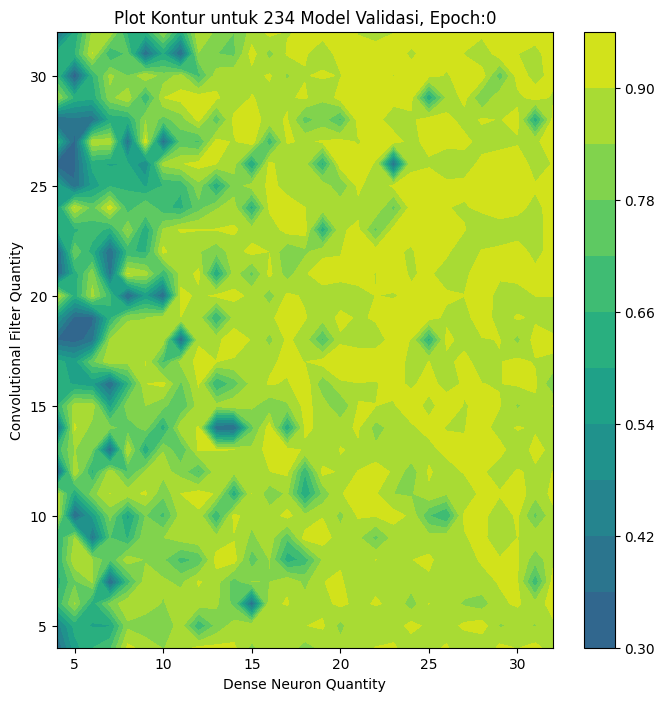

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
vmin, vmax = [0, 1]

# # getting the original colormap using cm.get_cmap() function 
# orig_map=plt.cm.get_cmap('viridis') 
  
# # reversing the original colormap using reversed() function 
# reversed_map = orig_map.reversed() 

contourf_ = ax.contourf(XX,YY,Z[:,:,0],10, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(contourf_)

plt.xlabel('Dense Neuron Quantity')
plt.ylabel('Convolutional Filter Quantity')
plt.title(f'Plot Kontur untuk 234 Model Validasi, Epoch:{0}')
plt.show()

In [4]:
# Library/fungsi yang wajib ada
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Menyiapkan figure, heatmap
fig, ax = plt.subplots(figsize=(8,8))
vmin, vmax = [0, 1]
levels = np.linspace(vmin, vmax, 60)

N = 10 # number of colors to extract from each of the base_cmaps below
base_cmaps = ['Greys','Purples','Reds','Oranges', 'Blues','Greens']

n_base = len(base_cmaps)
# we go from 0.2 to 0.8 below to avoid having several whites and blacks in the resulting cmaps
colors = np.concatenate([plt.get_cmap(name)(np.linspace(0.2,0.8,N)) for name in base_cmaps])
cmap = matplotlib.colors.ListedColormap(colors)

# Fungsi init
def init():
    plt.clf()
    return None

# Fungsi iterasi animasi
def animate(i):
    plt.clf()
    plt.contourf(XX,YY,Z[:,:,i], levels, vmin=vmin, extend = 'max', vmax=vmax, cmap=cmap)
    plt.colorbar()
    plt.xlabel('Dense Neuron Quantity')
    plt.ylabel('Convolutional Filter Quantity')
    plt.title(f'Plot Kontur untuk 841 Model Validasi, Epoch:{i+1}')
    return None

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=range(0, 40, 1), blit=False,
                               interval=500, init_func=init)

# Save the animation as a GIF
anim.save('animation.gif', writer='pillow', fps=2)  # FPS (frames per second) = 2 for 20-second runtime

print("Animation saved as 'animation.gif'")

Animation saved as 'animation.gif'


<Figure size 800x800 with 0 Axes>

In [5]:
np.shape(Hist_acc_val[0])

(841,)

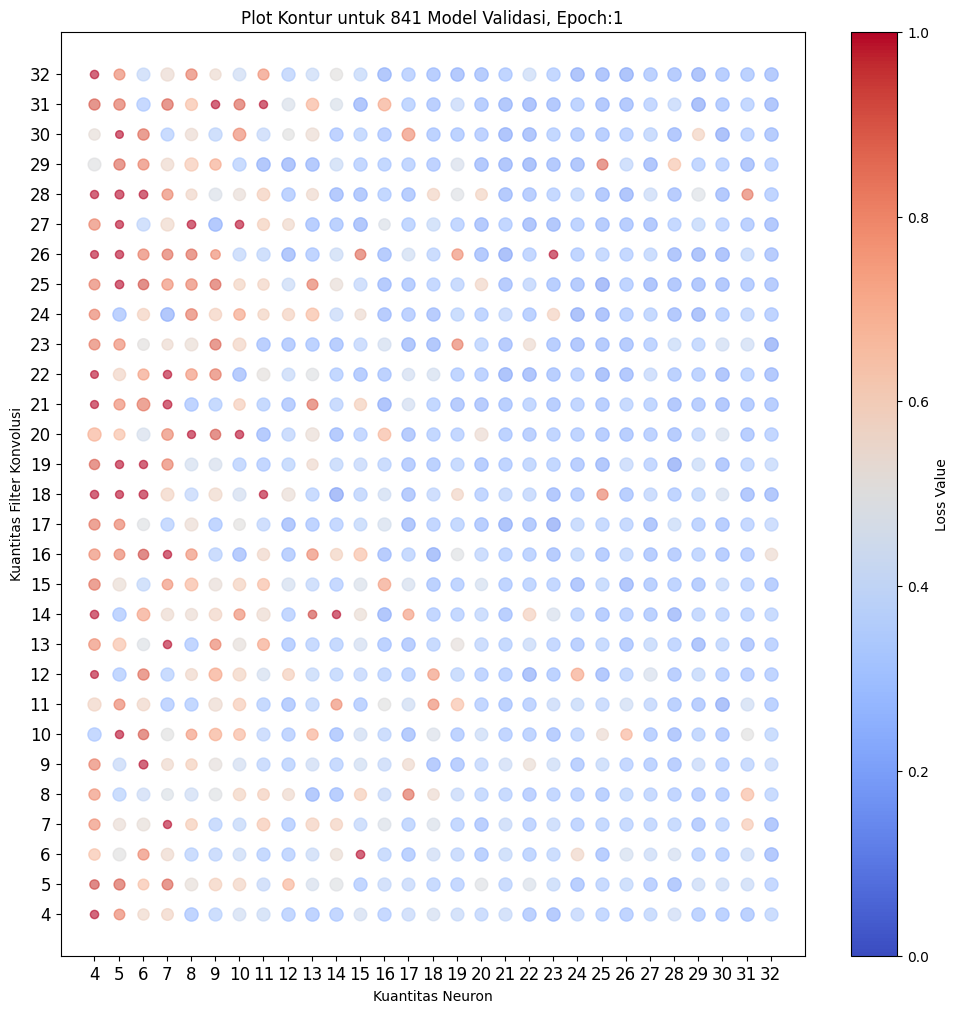

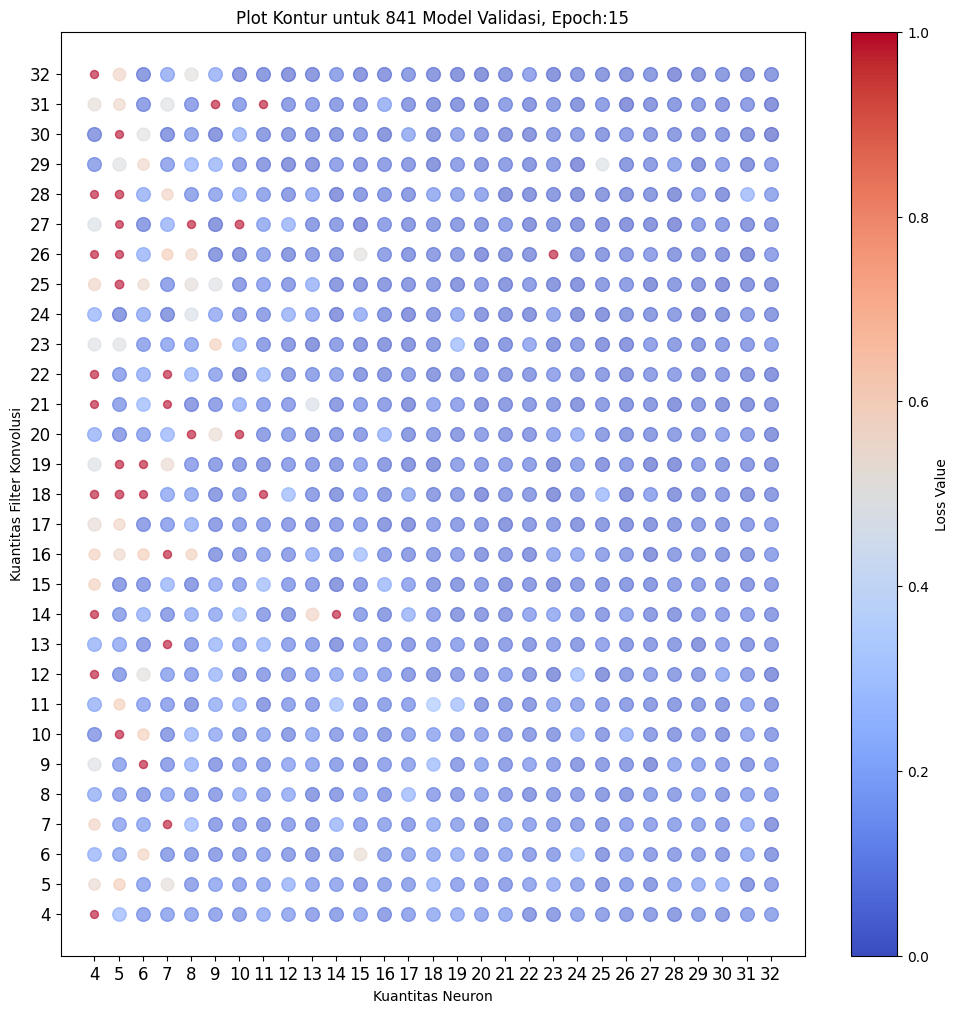

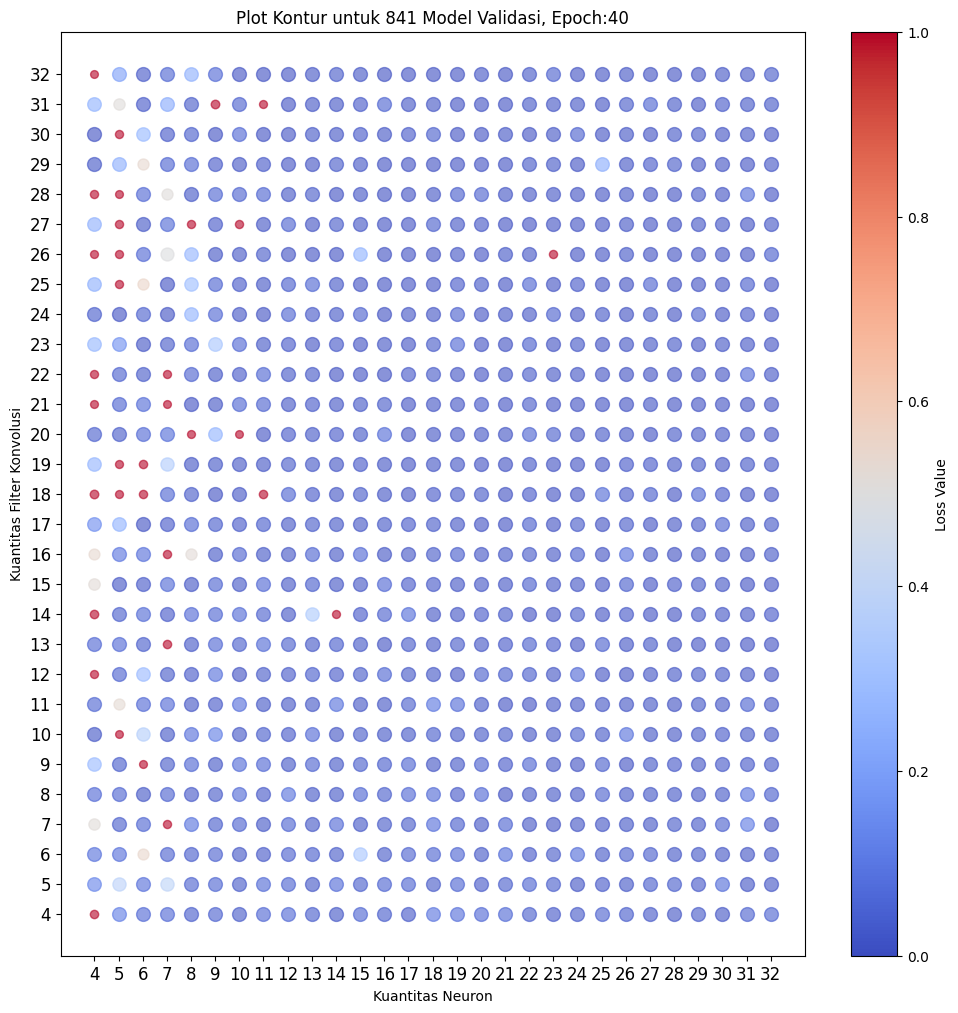

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: Replace this with your own matrix
for item in [0,14,39]:
    matrix = Hist_loss_val[item].reshape(29,29)  # Example output matrix (replace with your data)
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 12))
    
    k = 0
    # Add circles based on matrix values
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            value = Hist_acc_val[item].reshape(29,29)[i][j]
            size = value * 100  # Adjust scale for bubble sizes
            color = plt.cm.coolwarm(matrix[i,j])  # Color map based on value (can use other colormaps)
            
            # Plot the circle at position (j, i) with size and color
            ax.scatter(j, i, s=size, c=[color], alpha=0.6)
            k = k + 1
        k = 0
    
    # Customize axis labels
    ax.set_xticks(np.arange(len(X)))
    ax.set_xticklabels(X, fontsize=12)
    ax.set_yticks(np.arange(len(Y)))
    ax.set_yticklabels(Y, fontsize=12)
    plt.xlabel('Kuantitas Neuron')
    plt.title(f'Plot Kontur untuk 841 Model Validasi, Epoch:{item+1}')
    plt.ylabel('Kuantitas Filter Konvolusi')
    # Add colorbar
    plt.colorbar(plt.cm.ScalarMappable(cmap="coolwarm"), ax=ax, label="Loss Value")
    plt.show()


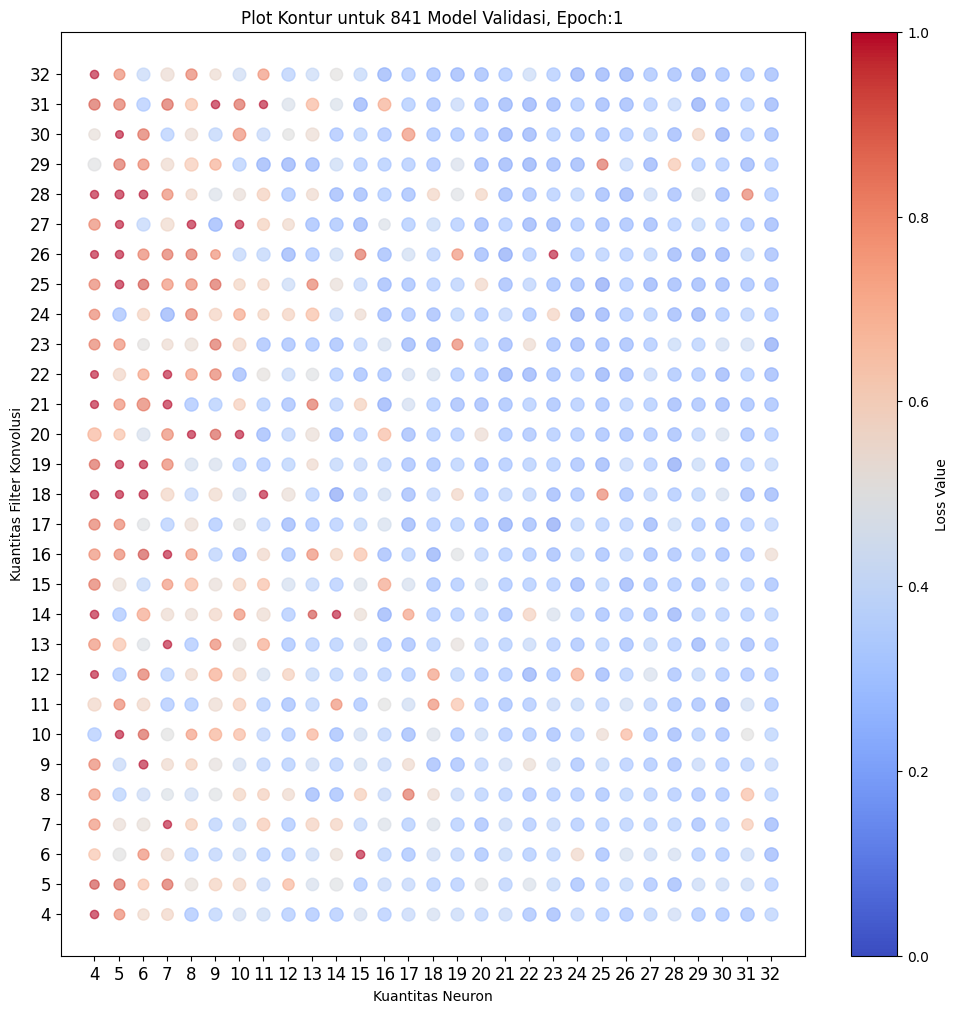

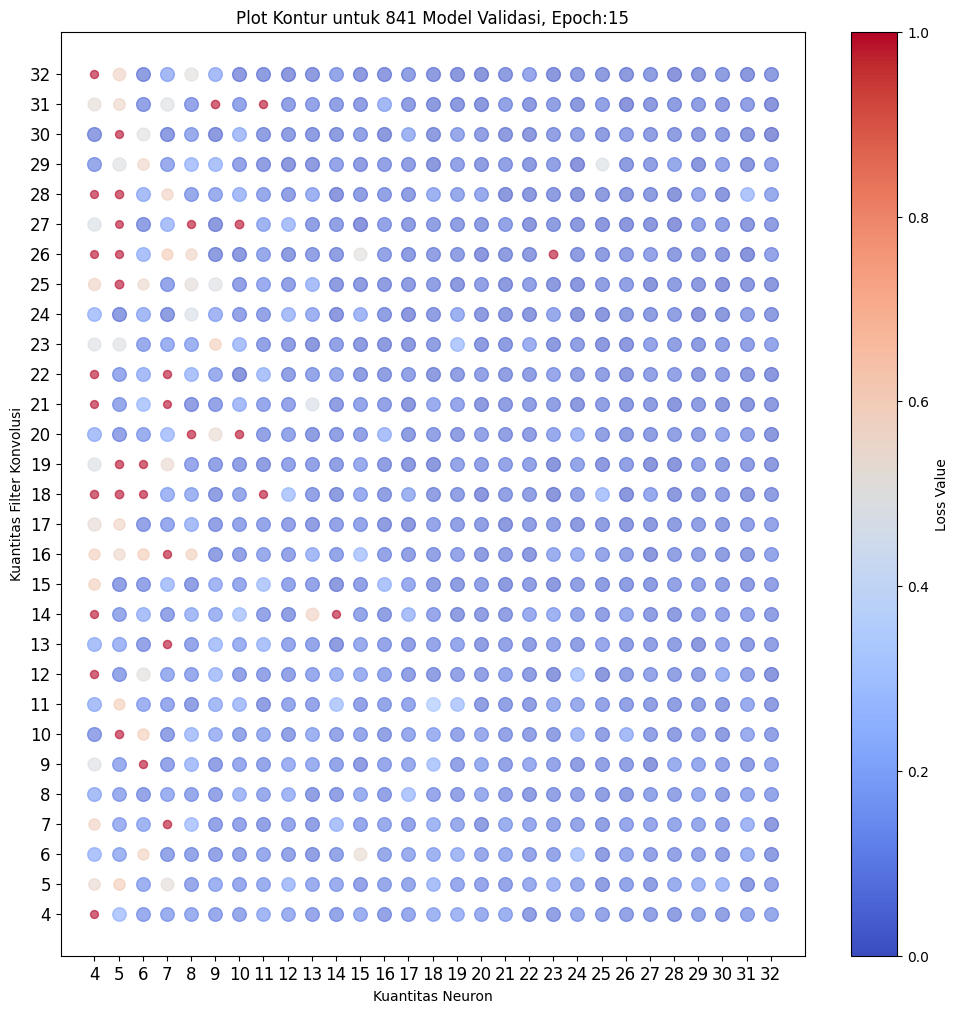

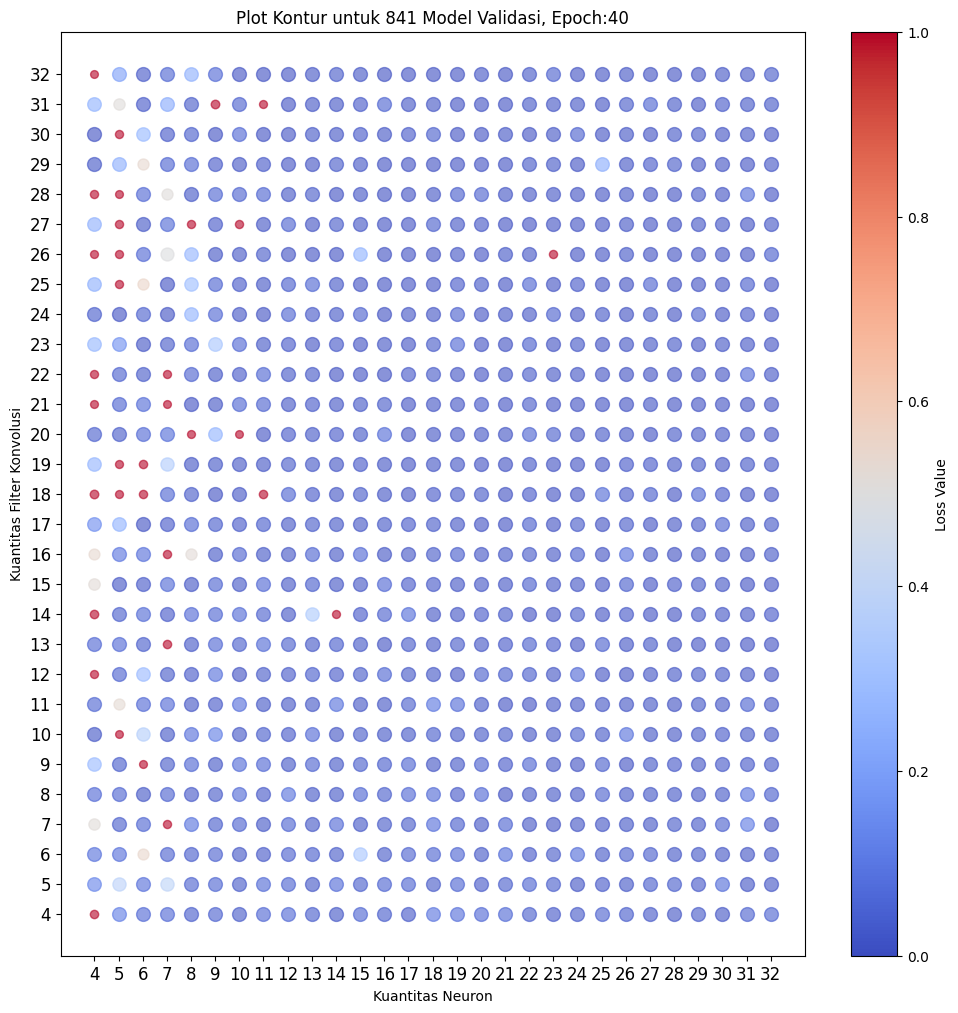

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: Replace this with your own matrix
for item in [0,14,39]:
    matrix = Hist_loss_val[item].reshape(29,29)  # Example output matrix (replace with your data)
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 12))
    
    k = 0
    # Add circles based on matrix values
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            value = Hist_acc_val[item].reshape(29,29)[i][j]
            size = value * 100  # Adjust scale for bubble sizes
            color = plt.cm.coolwarm(matrix[i,j])  # Color map based on value (can use other colormaps)
            
            # Plot the circle at position (j, i) with size and color
            ax.scatter(j, i, s=size, c=[color], alpha=0.6)
            k = k + 1
        k = 0
    
    # Customize axis labels
    ax.set_xticks(np.arange(len(X)))
    ax.set_xticklabels(X, fontsize=12)
    ax.set_yticks(np.arange(len(Y)))
    ax.set_yticklabels(Y, fontsize=12)
    plt.xlabel('Kuantitas Neuron')
    plt.title(f'Plot Kontur untuk 841 Model Validasi, Epoch:{item+1}')
    plt.ylabel('Kuantitas Filter Konvolusi')
    # Add colorbar
    plt.colorbar(plt.cm.ScalarMappable(cmap="coolwarm"), ax=ax, label="Loss Value")
    plt.show()


In [23]:
# Library/fungsi yang wajib ada
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Menyiapkan figure, heatmap
fig, ax = plt.subplots(figsize=(8,8))

# Fungsi init
def init():
    plt.clf()
    return None

# Fungsi iterasi animasi
def animate(item):
    matrix = Hist_loss_val[item].reshape(29,29)  # Example output matrix (replace with your data)
    
    k = 0
    # Add circles based on matrix values
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            value = Hist_acc_val[item].reshape(29,29)[i][j]
            size = value * 100  # Adjust scale for bubble sizes
            color = plt.cm.coolwarm(matrix[i,j])  # Color map based on value (can use other colormaps)
            
            # Plot the circle at position (j, i) with size and color
            plt.scatter(j, i, s=size, c=[color], alpha=0.6)
            k = k + 1
        k = 0

    # Customize axis labels
    ax.set_xticks(np.arange(len(X)))
    ax.set_xticklabels(X, fontsize=12)
    ax.set_yticks(np.arange(len(Y)))
    ax.set_yticklabels(Y, fontsize=12)
    plt.xlabel('Kuantitas Neuron')
    plt.title(f'Plot Kontur untuk 841 Model Validasi, Epoch:{item+1}')
    plt.ylabel('Kuantitas Filter Konvolusi')
    return None

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=range(0, 40, 1), blit=False,
                               interval=500, init_func=init)

# Save the animation as a GIF
anim.save('animation_2.gif', writer='pillow', fps=2)  # FPS (frames per second) = 2 for 20-second runtime

print("Animation saved as 'animation_2.gif'")

Animation saved as 'animation_2.gif'


<Figure size 800x800 with 0 Axes>